# Grafos y algoritmos voraces

In [33]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h4>1. Implemente el algoritmo de búsqueda en profundidad (DFS) y pruebelo para recorrer el grafo del laberinto de pacman.</h4>

In [24]:
graph = {'A': set(['B', 'C','D']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
vertex = ['A','B','C','D','E','F']

In [25]:
#tomado de: http://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/
def dfs_Graph(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

In [26]:
dfs_Graph(graph, 'D')

{'A', 'B', 'C', 'D', 'E', 'F'}

<h4>2. Realice el análisis del tiempo de ejecución del algoritmo DFS, justifiquelo.</h4>

In [27]:
def Recalculatedtime(t1,t2):    
    return t2 - t1

In [35]:
#Gráfica Insertion Size vs Time
import random as rnd
import time

def analysis_time_DFS_Graph(graph,vertex):
    results = []
    for i in range(len(vertex)):
        tic = time.clock()#get start time
        dfs_Graph(graph, vertex[i])
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

In [36]:
print analysis_time_DFS_Graph(graph,vertex)

[3.599999999992498e-05, 6.0999999999866716e-05, 1.7999999999851468e-05, 1.5000000000098268e-05, 0.00010099999999990672, 1.6999999999933735e-05]


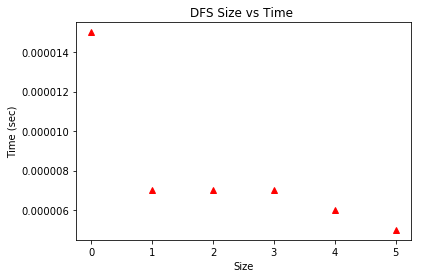

In [37]:
pl.clf()
lt = pl.title('DFS Size vs Time ')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
xit = np.arange(len(vertex))
yit = np.array(analysis_time_DFS_Graph(graph,vertex))
pl.plot(xit, yit, 'r^')

<h4>3. Diseñe e implemente un algoritmo que identifique ciclos en un grafo.</h4>

In [49]:
#Grafo con ciclo
g1 = {1: [2, 3],
      2: [3,4],
      3: [4,1]}

#grafo sin ciclo
g2 = {1: [2, 3],
      2: [3,4],
      3: [4]}


In [50]:
#tomado de: https://codereview.stackexchange.com/questions/86021/check-if-a-directed-graph-contains-a-cycle
def tieneCiclo(g):
    path = set()

    def visit(vertex):
        path.add(vertex)
        for neighbour in g.get(vertex, ()):
            if neighbour in path or visit(neighbour):
                return True
        path.remove(vertex)
        return False

    return any(visit(v) for v in g)

In [51]:
print 'grafo 1 tiene ciclo? ',tieneCiclo(g1)
print 'grafo 2 tiene ciclo? ',tieneCiclo(g2)

grafo 1 tiene ciclo?  True
grafo 2 tiene ciclo?  False
